## Student Performance Analysis Project

In the realm of education, understanding the factors that influence student performance is crucial for developing effective learning strategies and support systems. This project aims to explore the relationship between the time students dedicate to studying and their academic performance.

The analysis focuses on a dataset containing information about students, including their names, grades, pass/fail status, and the number of hours they spend studying. By examining these variables, I will like to answer several key questions:

1. Is there a significant correlation between study hours and grades?
2. Do students who pass their courses tend to study more than those who fail?
3. What is the overall pass rate, and how does it relate to study time?

To investigate these questions, we will employ various data visualization techniques and statistical analyses. Our approach includes:

1. Creating scatter plots to visualize the relationship between study hours and grades.
2. Using box plots to compare study hour distributions between passing and failing students.
3. Calculating correlation coefficients to quantify the strength of the relationship between study time and grades.
4. Computing average study hours for different student groups and overall pass rates.

Through this analysis, my aim is to provide insights that can be valuable for students, educators, and academic institutions. Understanding the impact of study time on academic performance can help in developing more effective study strategies, identifying at-risk students, and creating targeted interventions to improve overall academic outcomes.

This project not only demonstrates the application of data analysis techniques to real-world educational data but also highlights the importance of evidence-based decision-making in education. The findings from this analysis could potentially inform study recommendations, tutoring programs, and academic support initiatives.

In [57]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [55]:
path = "C:/Users/micho/OneDrive/Desktop/DATABASE/GITHUB/DATASET/students_data.csv"

In [38]:
df_students = pd.read_csv(path,delimiter=',',header='infer')

# # Remove any rows with missing data
# df_students = df_students.dropna(axis=0, how='any')

# # Calculate who passed, assuming '60' is the grade needed to pass
# passes  = pd.Series(df_students['Grade'] >= 60)

# # Save who passed to the Pandas dataframe
# df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

,Unnamed: 0,Name,StudyHours,Grade,Pass
0,0,Dan,10.00,50.0,False
1,1,Joann,11.50,50.0,False
2,2,Pedro,9.00,47.0,False
3,3,Rosie,16.00,97.0,True
4,4,Ethan,9.25,49.0,False
5,5,Vicky,1.00,3.0,False
6,6,Frederic,11.50,53.0,False
7,7,Jimmie,9.00,42.0,False
8,8,Rhonda,8.50,26.0,False
9,9,Giovanni,14.50,74.0,True


In [39]:
df_students.columns

Index(['Unnamed: 0', 'Name', 'StudyHours', 'Grade', 'Pass'], dtype='object')

In [40]:
df_students= df_students.drop(['Unnamed: 0'], axis = 1)

In [41]:
df_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


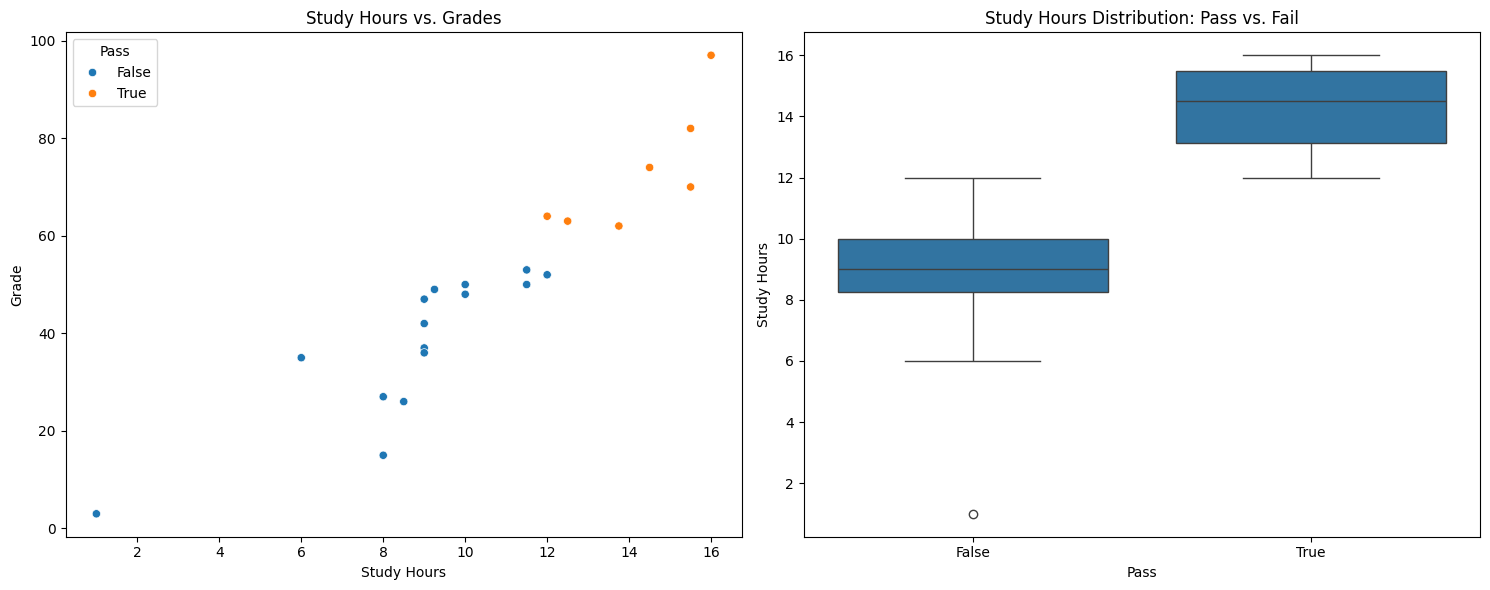

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Study Hours vs. Grades
sns.scatterplot(data=df_students, x='StudyHours', y='Grade', hue='Pass', ax=ax1)
ax1.set_title('Study Hours vs. Grades')
ax1.set_xlabel('Study Hours')
ax1.set_ylabel('Grade')

# Box plot: Pass/Fail vs. Study Hours
sns.boxplot(data=df_students, x='Pass', y='StudyHours', ax=ax2)
ax2.set_title('Study Hours Distribution: Pass vs. Fail')
ax2.set_xlabel('Pass')
ax2.set_ylabel('Study Hours')

# Adjust layout and display
plt.tight_layout()
plt.show()

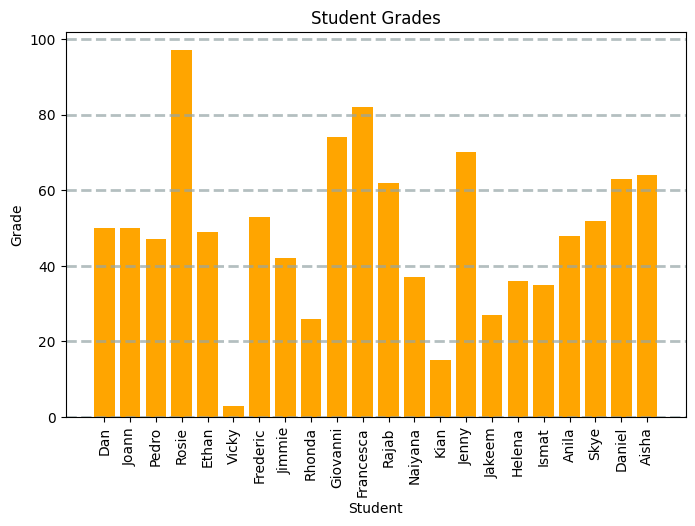

In [42]:

fig = plt.figure(figsize=(8,5))
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Name'>

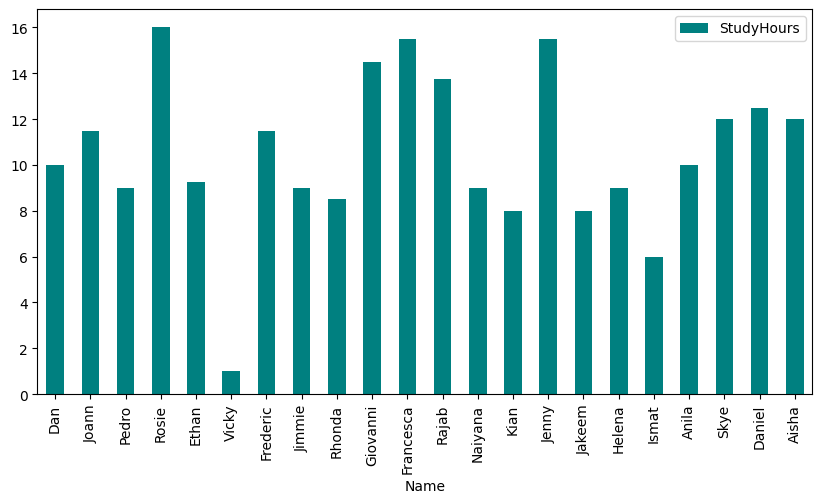

In [43]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(10,5))

Text(0.5, 0.98, 'Student Data')

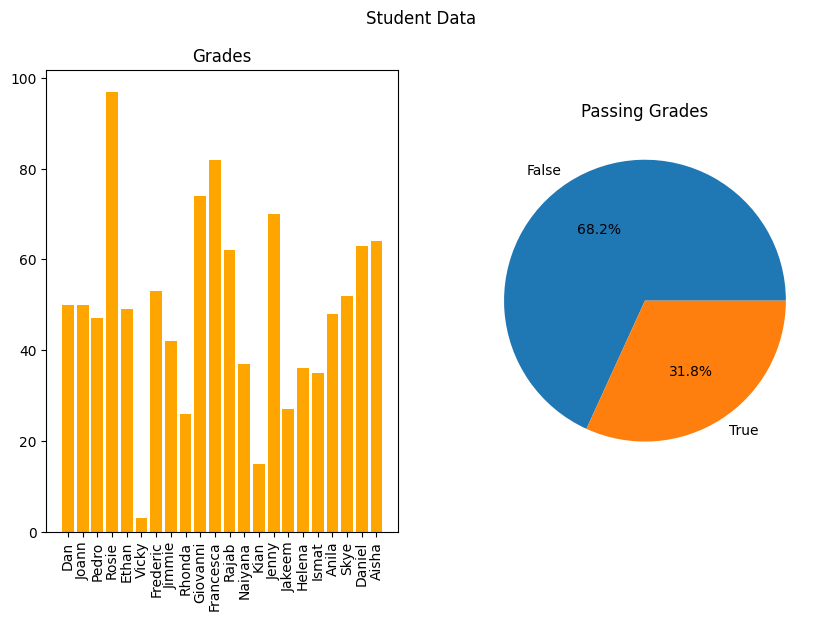

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.bar(df_students.Name, df_students.Grade, color='orange')
ax1.set_title('Grades')
ax1.tick_params(axis='x', rotation=90)

pass_counts = df_students['Pass'].value_counts()
ax2.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%')
ax2.set_title('Passing Grades')

fig.suptitle('Student Data')

C:\Users\micho\AppData\Local\Temp\ipykernel_10368\571225234.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\micho\AppData\Local\Temp\ipykernel_10368\571225234.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


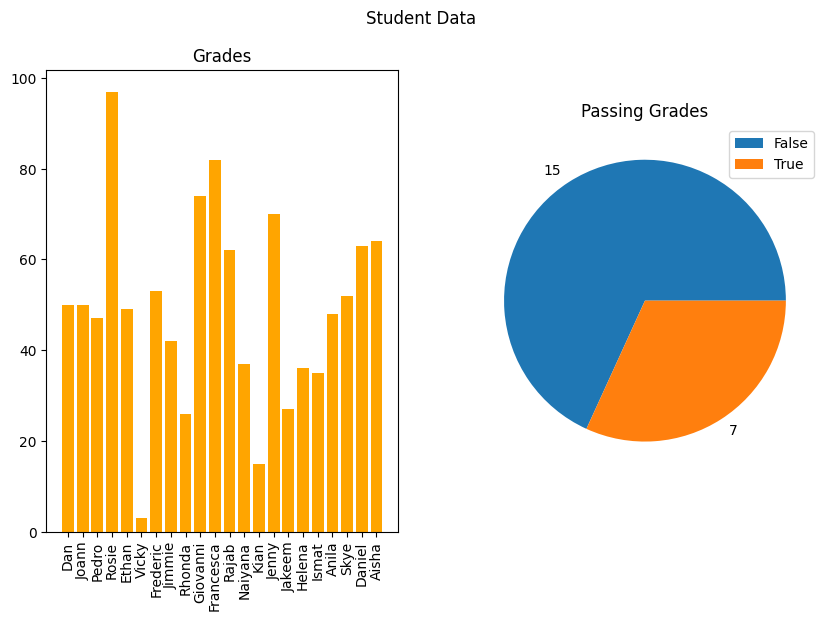

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())
fig.suptitle('Student Data')
fig.show()


### Descriptive statistics and data distribution

When examining a variable (for example, a sample of student grades), I am particularly interested in its distribution (in other words, how all the different grade values are spread across the sample). The starting point for this exploration is often to visualize the data as a histogram and see how frequently each value for the variable occurs.

C:\Users\micho\AppData\Local\Temp\ipykernel_10368\2056578951.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


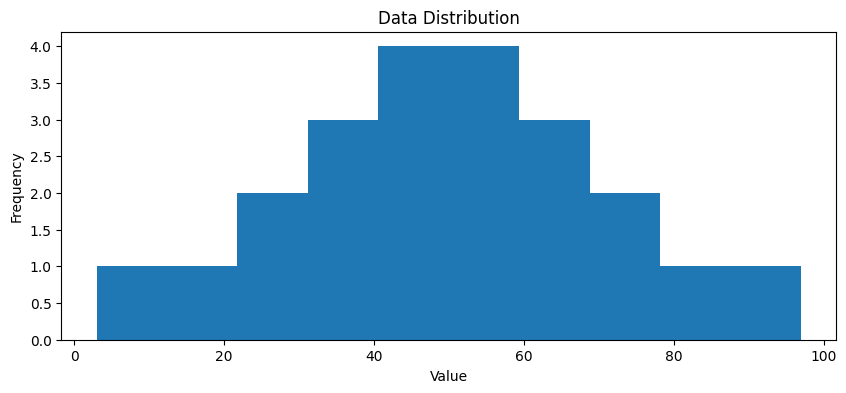

In [46]:
var_data = df_students['Grade']

fig = plt.figure(figsize=(10,4))

plt.hist(var_data)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
fig.show()

The histogram for grades is a symmetric shape, where the most frequently occurring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

Measures of central tendency
To understand the distribution better, I want to examine the so-called measures of central tendency, which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this analysis is to try to find a "typical" value. 

Common ways to define the middle of the data include:
The mean: A simple average based on adding together all of the values in the sample set and then dividing the total by the number of samples.
The median: The value in the middle of the range of all of the sample values.
The mode: The most commonly occurring value in the sample set*.
Let's calculate these values, along with the minimum and maximum values for comparison, and show them on the histogram.

In [47]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [48]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\micho\AppData\Local\Temp\ipykernel_10368\7536840.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


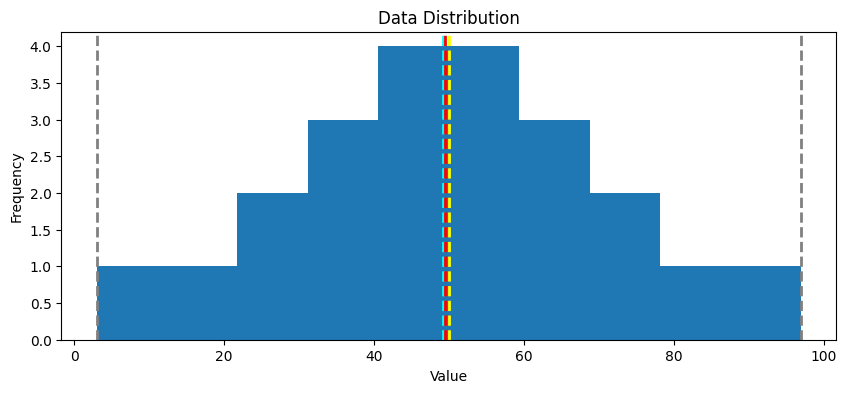

In [49]:
fig = plt.figure(figsize=(10,4))

plt.hist(var)
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

C:\Users\micho\AppData\Local\Temp\ipykernel_10368\3086019639.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


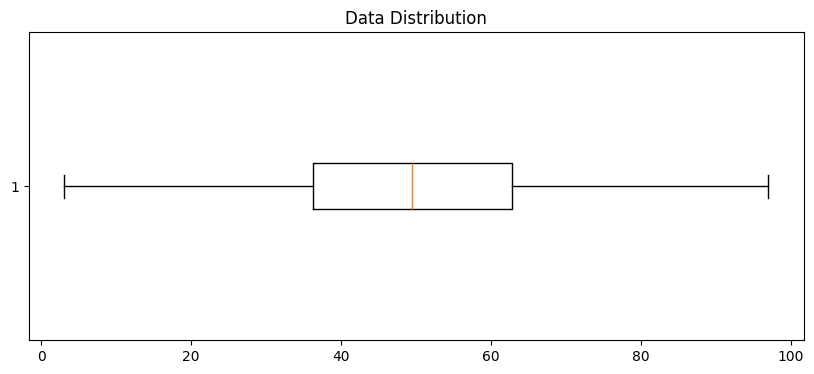

In [53]:
var = df_students['Grade']

fig = plt.figure(figsize=(10,4))
plt.boxplot(var, vert=False)
plt.title('Data Distribution')
fig.show()

The box plot shows the distribution of the grade values in a format different from the histogram. The box part of the plot shows where the inner two quartiles of the data reside. In this case, half of the grades are between approximately 36 and 63. The whiskers extending from the box show the outer two quartiles, so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the median value.

For learning, it's useful to combine histograms and box plots, with the box plot's orientation changed to align it with the histogram. (In some ways, it's helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above.)

C:\Users\micho\AppData\Local\Temp\ipykernel_10368\3027733966.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


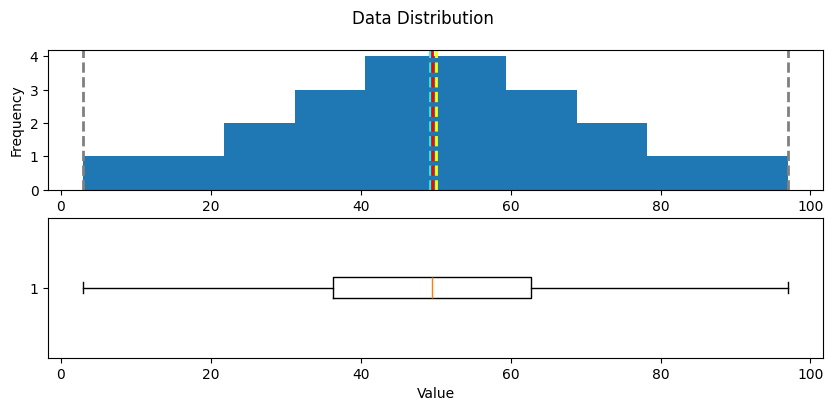

In [54]:
fig, ax = plt.subplots(2, 1, figsize = (10,4))

ax[0].hist(var_data)
ax[0].set_ylabel('Frequency')
ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

ax[1].boxplot(var_data, vert=False)
ax[1].set_xlabel('Value')

fig.suptitle('Data Distribution')
fig.show()


All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking samples of data and using probability functions to extrapolate information about the full population of data.

What does this mean? Samples refer to the data we have on hand, such as information about these 22 students' study habits and grades. The population refers to all possible data we could collect, such as every student's grades and study habits across every educational institution throughout the history of time. Usually, we're interested in the population, but it's simply not practical to collect all of that data. Instead, I need to try estimate what the population is like from the small amount of data (samples) that I have.

If I have enough samples, I can calculate something called a probability density function, which estimates the distribution of grades for the full population.


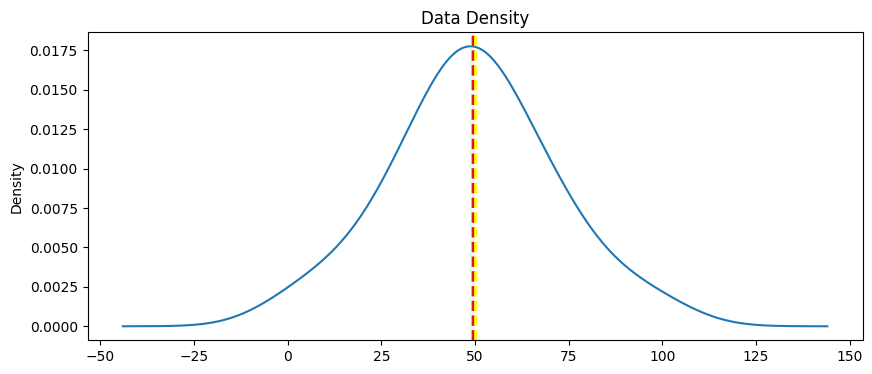

In [52]:
def show_density(var_data):

    fig = plt.figure(figsize=(10,4))
    var_data.plot.density()
    plt.title('Data Density')
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

# Get the density of Grade
col = df_students['Grade']
show_density(col)

As expected from the histogram of the sample, the density shows the characteristic "bell curve" which is also known as normal distribution with the mean and mode at the center and symmetric tails.

Recommendations

Based on my analysis of the relationship between study hours and student performance, I hereby propose the following recommendations:

1. Promote Optimal Study Time:
   Our data suggests a positive correlation between study hours and grades. We recommend encouraging students to aim for an optimal range of study hours, which appears to be 10 hours per week based on my findings. However, emphasize that quality of study is as important as quantity.

2. Implement Early Intervention Programs:
   Identify students with significantly lower study hours early in the semester. Develop targeted intervention programs to help these students improve their study habits and time management skills before their grades are adversely affected.

3. Personalized Study Plans:
   Create personalized study plans for students based on their current study hours and performance. This could involve gradually increasing study time for underperforming students or optimizing study techniques for those already putting in significant hours.

4. Time Management Workshops:
   Organize workshops focusing on effective time management and study techniques. These sessions can help students maximize the effectiveness of their study hours, potentially improving performance without necessarily increasing study time.

5. Regular Check-ins:
   Implement a system of regular check-ins where students can report their study hours and receive feedback. This can help in monitoring progress and making timely adjustments to study plans.

6. Balanced Approach to Academic Life:
   While the data shows a correlation between study hours and performance, it's crucial to promote a balanced lifestyle. Encourage students to engage in extracurricular activities and self-care alongside their studies to prevent burnout.

7. Peer Study Groups:
   Facilitate the formation of peer study groups. Students who are excelling with their current study habits can share their strategies with others, promoting collaborative learning and potentially improving overall class performance.

8. Technology-Aided Study Tracking:
   Introduce a user-friendly app or platform where students can easily log their study hours. This can provide valuable data for further analysis and help students self-monitor their study habits.

9. Differentiated Support:
   Provide differentiated support based on pass/fail status. For students who are passing but studying excessively, focus on study efficiency. For those failing despite significant study hours, investigate potential learning difficulties or other underlying issues.

10. Continuous Data Collection and Analysis:
    Continue collecting and analyzing data on study hours and performance over multiple semesters. This longitudinal data can reveal long-term trends and the effectiveness of implemented strategies.

By implementing these recommendations, my aim is to create a more supportive academic environment that promotes effective studying habits, improves student performance, and enhances overall educational outcomes.

### Author:
[Jolayemi S. Babatunde](linkedin.com/in/babatunde-jolayemi-a05312275)